In [ ]:
!pip3 install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 2.6 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
from tslearn.clustering import silhouette_score
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [25, 8]

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesScalerMinMax
from tslearn.utils import to_time_series_dataset
import pandas as pd

In [ ]:
# mounting the google drive for importing dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# changing the directory to where the folder for the dataset is located
%cd /content/drive/My Drive//Objective 3/

/content/drive/My Drive/Objective 3


In [ ]:
import pandas as pd
import os

# Load your original dataset
df = pd.read_excel(r"UP08.xlsx", index_col='Date_Time')
df = df[['dissolvedoxygenmeasured']]
df=df['2017-04-01':'2021-03-31']

# Print the DataFrame to check the result
print(df)

                     dissolvedoxygenmeasured
Date_Time                                   
2017-04-01 00:00:00                     7.15
2017-04-01 01:00:00                     7.28
2017-04-01 02:00:00                     7.29
2017-04-01 03:00:00                     7.14
2017-04-01 04:00:00                     7.02
...                                      ...
2021-03-31 19:00:00                     7.81
2021-03-31 20:00:00                     7.81
2021-03-31 21:00:00                     7.44
2021-03-31 22:00:00                     7.61
2021-03-31 23:00:00                     7.38

[35064 rows x 1 columns]


In [ ]:
# Assuming df is your DataFrame
df.index = pd.to_datetime(df.index)

# Extract month from the 'Date_Time' index
df['Month'] = df.index.month

# Create a dictionary to store DataFrames for each month
monthly_data = {}

# Iterate over unique months and create a DataFrame for each month
for month in df['Month'].unique():
    monthly_data[month] = df[df['Month'] == month].drop('Month', axis=1)

# Access individual DataFrames for each month using the month as the key
for month, data in monthly_data.items():
    print(f"Month {month}:\n{data}\n")

Month 4:
                     dissolvedoxygenmeasured
Date_Time                                   
2017-04-01 00:00:00                 7.150000
2017-04-01 01:00:00                 7.280000
2017-04-01 02:00:00                 7.290000
2017-04-01 03:00:00                 7.140000
2017-04-01 04:00:00                 7.020000
...                                      ...
2020-04-30 19:00:00                 6.579816
2020-04-30 20:00:00                 6.578402
2020-04-30 21:00:00                 6.576989
2020-04-30 22:00:00                 6.575576
2020-04-30 23:00:00                 6.574162

[2880 rows x 1 columns]

Month 5:
                     dissolvedoxygenmeasured
Date_Time                                   
2017-05-01 00:00:00                 9.720000
2017-05-01 01:00:00                 9.410000
2017-05-01 02:00:00                 9.040000
2017-05-01 03:00:00                 8.860000
2017-05-01 04:00:00                 8.280000
...                                      ...
2020-05-31 

In [ ]:
import pandas as pd

# Assuming df is your DataFrame

# Make sure the 'Date_Time' column is in datetime format
df.index = pd.to_datetime(df.index)

# Create an array to store time series for each month
X_train = []

# Iterate over unique months
for month in df.index.month.unique():
    # Extract data for the current month
    monthly_data = df[df.index.month == month]['dissolvedoxygenmeasured']

    # Append the data to the array
    X_train.append(monthly_data.values)

In [ ]:
X_train = to_time_series_dataset(X_train)

In [ ]:
seed = 0
np.random.seed(seed)
sz = X_train.shape[1]

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = TimeSeriesKMeans(n_clusters=k,
                          n_init=2,
                          metric="dtw",
                          verbose=False,
                          max_iter_barycenter=10,
                          random_state=0)

    km = km.fit(X_train)
    Sum_of_squared_distances.append(km.inertia_)

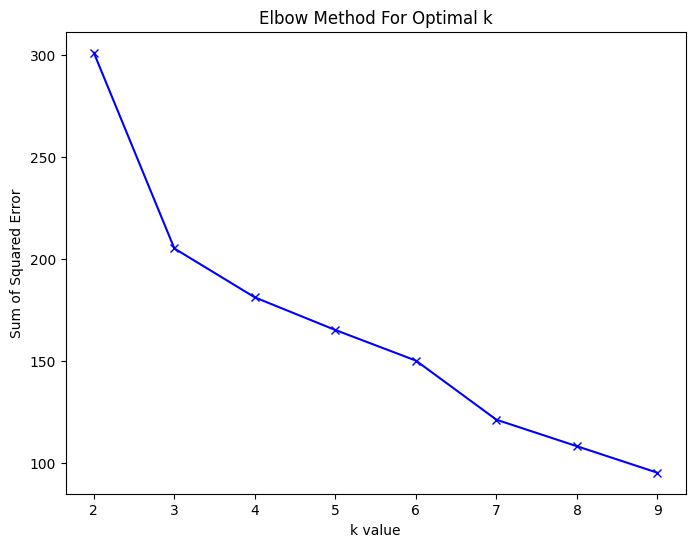

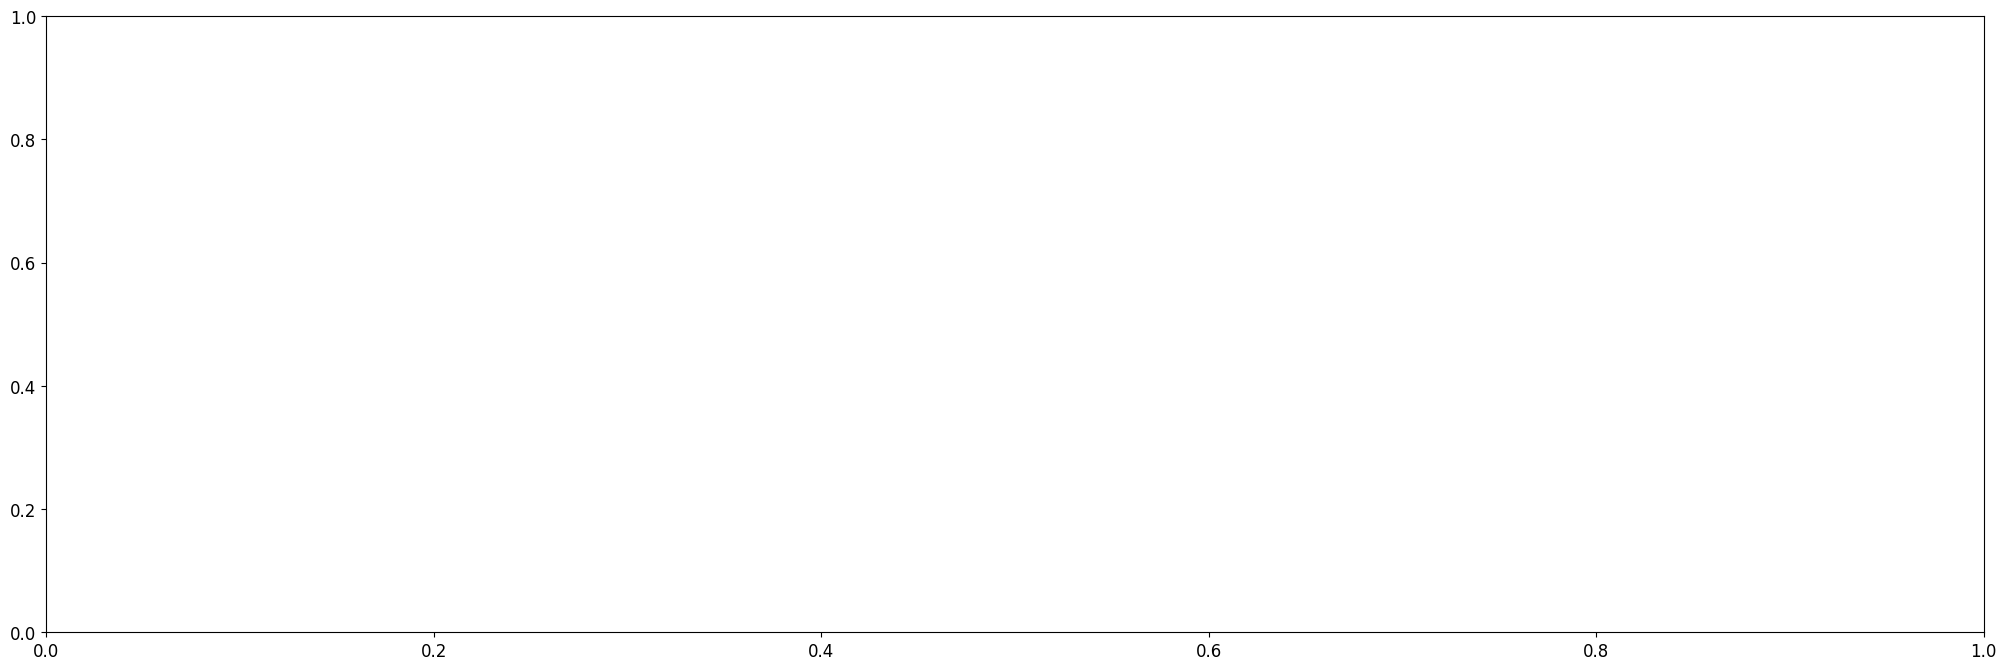

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Assuming X_train is your array with shape (12, 744, 1)
# Reshape it to (744, 12)

X_train_reshaped = X_train.reshape((12,2976))
X_train_reshaped = X_train_reshaped.T
# Create a DataFrame with the reshaped array
df_X_train = pd.DataFrame(X_train_reshaped, columns=[f'Month_{i+1}' for i in range(12)])

# Display the resulting DataFrame
print(df_X_train)

      Month_1   Month_2  Month_3  Month_4  Month_5  Month_6  Month_7  Month_8  \
0        7.15  9.720000     6.92     6.84     8.36     8.21     8.07     8.16   
1        7.28  9.410000     6.83     6.87     8.39     8.22     8.07     8.13   
2        7.29  9.040000     6.70     6.80     8.39     8.25     8.07     8.11   
3        7.14  8.860000     6.68     6.75     8.35     8.26     8.08     8.06   
4        7.02  8.280000     6.62     6.79     8.35     8.29     8.08     8.03   
...       ...       ...      ...      ...      ...      ...      ...      ...   
2971      NaN  5.528305      NaN     4.79     7.51      NaN     9.97      NaN   
2972      NaN  5.526892      NaN     4.77     7.52      NaN     9.85      NaN   
2973      NaN  5.525478      NaN     4.74     7.52      NaN     9.75      NaN   
2974      NaN  5.524065      NaN     4.72     7.41      NaN     9.67      NaN   
2975      NaN  5.522652      NaN     4.69     7.43      NaN     9.64      NaN   

      Month_9  Month_10  Mo

In [ ]:
import calendar

# Assuming df is your DataFrame with columns like "Month_1", "Month_2", ...
# Extract the month number from column names
month_numbers = [int(col.split('_')[1]) for col in df_X_train.columns]

# Map month numbers to month names
month_names = [calendar.month_name[month] for month in month_numbers]

# Rename the DataFrame columns
df_X_train.columns = month_names

In [ ]:
# Assuming df_X_train is your DataFrame with columns like "January", "February", ...
# Extract the month number from column names
month_numbers = [list(calendar.month_name).index(col) for col in df_X_train.columns]

# Add 3 to each month number to shift to the desired months
new_month_numbers = [(month + 3) % 12 or 12 for month in month_numbers]
# Map new month numbers to month names
new_month_names = [calendar.month_name[month] for month in new_month_numbers]

# Rename the DataFrame columns
df_X_train.columns = new_month_names

In [ ]:
print(df_X_train)

      April       May  June  July  August  September  October  November  \
0      7.15  9.720000  6.92  6.84    8.36       8.21     8.07      8.16   
1      7.28  9.410000  6.83  6.87    8.39       8.22     8.07      8.13   
2      7.29  9.040000  6.70  6.80    8.39       8.25     8.07      8.11   
3      7.14  8.860000  6.68  6.75    8.35       8.26     8.08      8.06   
4      7.02  8.280000  6.62  6.79    8.35       8.29     8.08      8.03   
...     ...       ...   ...   ...     ...        ...      ...       ...   
2971    NaN  5.528305   NaN  4.79    7.51        NaN     9.97       NaN   
2972    NaN  5.526892   NaN  4.77    7.52        NaN     9.85       NaN   
2973    NaN  5.525478   NaN  4.74    7.52        NaN     9.75       NaN   
2974    NaN  5.524065   NaN  4.72    7.41        NaN     9.67       NaN   
2975    NaN  5.522652   NaN  4.69    7.43        NaN     9.64       NaN   

      December  January  February  March  
0         9.72     8.82      9.22   9.21  
1         9.5

DBA k-means
Dataset Cluster Mapping:
April -> Cluster 3
May -> Cluster 3
June -> Cluster 2
July -> Cluster 2
August -> Cluster 2
September -> Cluster 3
October -> Cluster 3
November -> Cluster 1
December -> Cluster 1
January -> Cluster 1
February -> Cluster 1
March -> Cluster 3

Cluster Datasets:
Cluster 1: November, December, January, February
Cluster 2: June, July, August
Cluster 3: April, May, September, October, March

Cluster 1 Statistics:
Minimum Value: 4.08
Maximum Value: 12.31
Average Value: 9.329795584176663

Cluster 2 Statistics:
Minimum Value: 3.75
Maximum Value: 10.67
Average Value: 6.726273690759923

Cluster 3 Statistics:
Minimum Value: 2.79
Maximum Value: 16.28
Average Value: 7.765975859887694


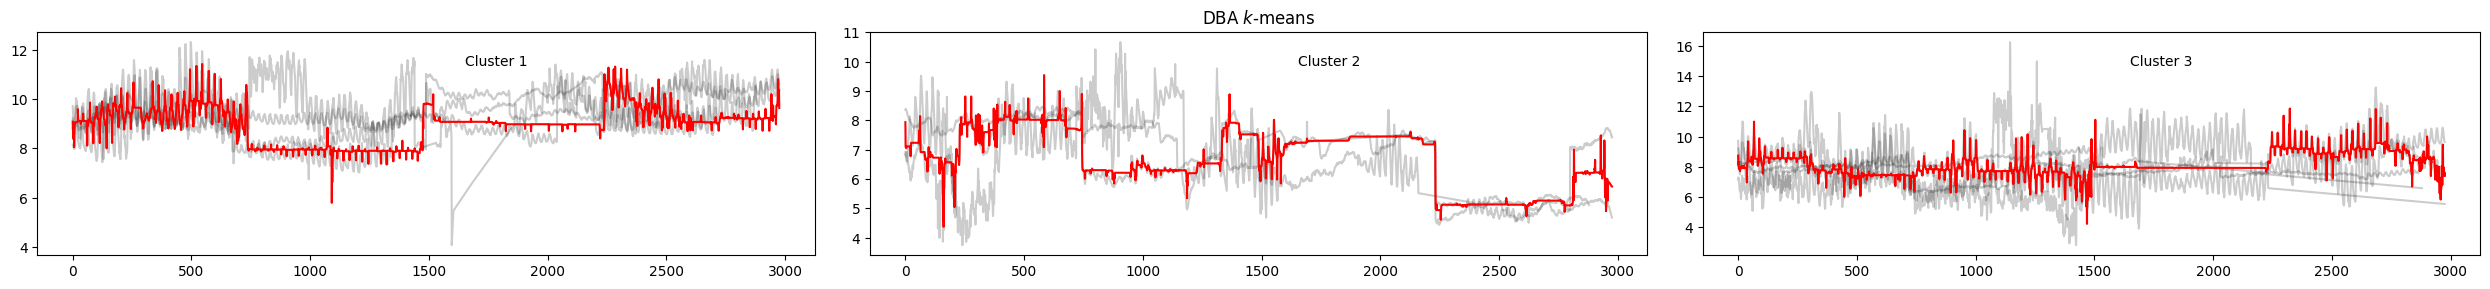

In [ ]:
n_clusters = 3

print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=n_clusters,
                          n_init=2,
                          metric="dtw",
                          verbose=False,
                          max_iter_barycenter=10,
                          random_state=42)
y_pred_dba_km = dba_km.fit_predict(X_train)

# Create a mapping between dataset indices and cluster assignments
dataset_cluster_mapping = {f'{column}': cluster_id + 1 for column, cluster_id in zip(df_X_train.columns, y_pred_dba_km)}

# Print the mapping
print("Dataset Cluster Mapping:")
for dataset, cluster in dataset_cluster_mapping.items():
    print(f"{dataset} -> Cluster {cluster}")

cluster_datasets = {cluster_id: [] for cluster_id in range(1, n_clusters + 1)}

# Populate the dictionary with datasets for each cluster
for dataset, cluster_id in dataset_cluster_mapping.items():
    cluster_datasets[cluster_id].append(dataset)

# Print the clusters and their associated datasets
print("\nCluster Datasets:")
for cluster_id, datasets in cluster_datasets.items():
    datasets_str = ", ".join(datasets)
    print(f"Cluster {cluster_id}: {datasets_str}")

min_values = []
max_values = []
avg_values = []

# Iterate through clusters
for cluster_id in range(n_clusters):
    cluster_data = X_train[y_pred_dba_km == cluster_id]

    # Calculate minimum, maximum, and average values for each cluster
    min_cluster = np.nanmin(cluster_data)
    max_cluster = np.nanmax(cluster_data)
    avg_cluster = np.nanmean(cluster_data)

    # Append values to the lists
    min_values.append(min_cluster)
    max_values.append(max_cluster)
    avg_values.append(avg_cluster)

    # Print cluster statistics
    print(f"\nCluster {cluster_id + 1} Statistics:")
    print(f"Minimum Value: {min_cluster}")
    print(f"Maximum Value: {max_cluster}")
    print(f"Average Value: {avg_cluster}")

# Visualize the clusters
for yi in range(n_clusters):
    plt.subplot(3, n_clusters, yi+1)
    for xx in X_train[y_pred_dba_km == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.text(0.55, 0.85, f'Cluster {yi + 1}', transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

plt.tight_layout()
plt.show()